In [11]:
#Побудувати звичайну багатошарову нейронну мережу для датасету fashion mnist. Завантажити датасет.
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Завантаження датасету Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


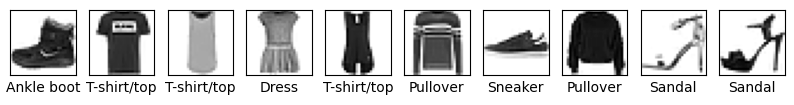

In [12]:
#Роздрукувати 10 зображень.
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names [ train_labels[i]])
plt.show()

In [13]:
#Підготувати дані, побудувати архітектуру.
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

train_images = train_images / 255.0
test_images = test_images / 255.0

model = models. Sequential([
    layers.Flatten (input_shape=(28, 28)),
    layers. Dense (512, activation='relu'),
    layers. Dense (256, activation='relu'),
    layers. Dense (128, activation='relu'),
    layers. Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Використати ранню зупинку і зменшення швидкості для запобіганню перенавчанню.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7804 - loss: 0.6096 - val_accuracy: 0.8551 - val_loss: 0.4032 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8656 - loss: 0.3654 - val_accuracy: 0.8675 - val_loss: 0.3701 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8778 - loss: 0.3309 - val_accuracy: 0.8697 - val_loss: 0.3621 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8850 - loss: 0.3078 - val_accuracy: 0.8780 - val_loss: 0.3360 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8938 - loss: 0.2839 - val_accuracy: 0.8758 - val_loss: 0.3521 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9000 - loss: 0.2686 - val_accuracy: 0.8748 - val_loss: 0.3487 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9151 - l

In [15]:
#Вивести архітектуру моделі.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

In [16]:
#Зберегти модель на гугл диск.
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/fashion_mnist_model.h5')

Mounted at /content/drive


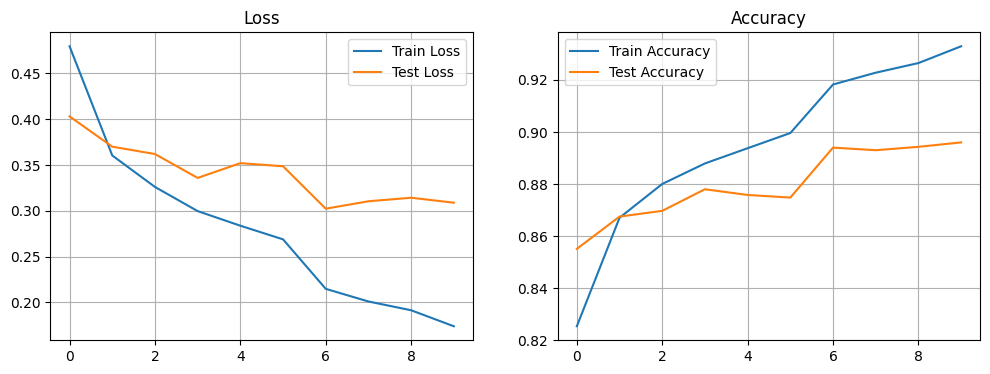

In [17]:
#Побудувати графіки функції втрат і точності для тренувальних і тестових даних.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [18]:
#Вивести класифікаційний звіт.
from sklearn.metrics import classification_report
import numpy as np

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)

print(classification_report (test_labels, predicted_labels, target_names=class_names))

313/313 - 0s - 1ms/step - accuracy: 0.8940 - loss: 0.3024
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.81      0.81      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.73      0.72      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



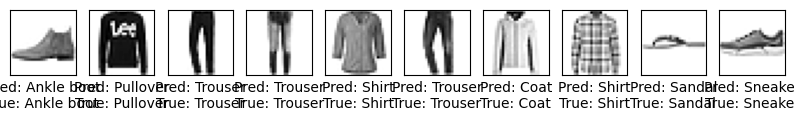

In [19]:
#Результати розпізнавання із прогнозованим і справжнім класом.
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names [predicted_labels[i]]}\nTrue: {class_names [test_labels[i]]}")
plt.show()

In [ ]:
#Висновок: у даній лабораторній роботі було проведено розпізнавання зображень за допомогою нейронної мережі на базі датасету Fashion MNIST.

#Датасет Fashion MNIST, який містить зображення одягу, був завантажений і підготовлений для використання в навчанні моделі.
#Дані були нормалізовані, а мітки перетворені в формат One-Hot Encoding.

#Була побудована простенька нейронна мережа з кількома шарами: вхідний шар, два повнозв'язкових шари і вихідний шар. Для оптимізації використано алгоритм Adam.
#Модель навчалася протягом декількох епох, з використанням методу ранньої зупинки та зменшення швидкості навчання для запобігання перенавчанню.

#Після навчання моделі було проведено оцінку її точності на тестових даних.
#Також було побудовано графіки функції втрат і точності для тренувальних та валідаційних даних, що дозволило спостерігати за поведінкою моделі під час навчання і переконатися в тому, що модель не перенавчалася.

#Класифікаційний звіт показав точність моделі для кожного класу.
#Прогнозовані та реальні класи для деяких тестових зображень були виведені у вигляді таблиці, що дозволило наочно оцінити якість роботи моделі.

#Модель продемонструвала гарні результати на тестових даних, з високою точністю в розпізнаванні різних типів одягу.
#Завдяки використанню методів регуляризації, таких як рання зупинка та зменшення швидкості навчання, вдалося уникнути перенавчання і досягти стабільних результатів на валідаційних та тестових даних.
#Ця робота продемонструвала ефективність використання нейронних мереж для задачі класифікації зображень, а також важливість правильного налаштування параметрів моделі для досягнення оптимальних результатів.

#Посилання на гітхаб: https://github.com/nastiadzen/Machine-learning